In [14]:
import os
import cv2
import numpy as np
#import layers
import matplotlib.pyplot as plt

In [61]:
# credits to https://towardsdatascience.com/lines-detection-with-hough-transform-84020b3b1549

import matplotlib.lines as mlines

# ist a,b == m, c

def line_detection_non_vectorized(image, edge_image, num_rhos=100, num_thetas=100, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image, cmap="gray")
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image, cmap="gray")
  #
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho))
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)
  line_results = list()
  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        rho = rhos[y]
        theta = thetas[x]
        #print(theta)
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))

        x0 = (a * rho) + edge_width_half
        #print(x0)

        y0 = (b * rho) + edge_height_half
        #print(y0)
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        #print([x1, x2])
        #print([y1, y2])
        #print("###")
        subplot3.plot([theta], [rho], marker='o', color="yellow")
        line_results.append([(x1,y1), (x2,y2)])
        subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas, line_results

(400, 600)


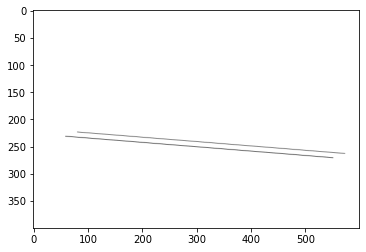

In [3]:
img = cv2.imread(f"C:/Users/fredi/Desktop/Uni/SELS2/github/dronelab/simulation/simulated_data/1.png",  cv2.IMREAD_GRAYSCALE)
#img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, "gray")
plt.show()

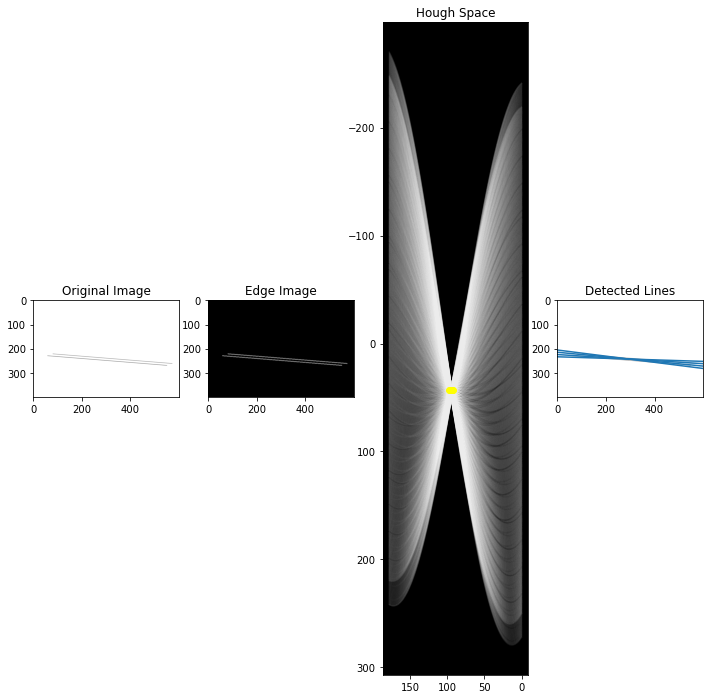

In [62]:
edge_image = cv2.Canny(img, 100, 200)
acc, rhos, thetas, line_results = line_detection_non_vectorized(img, edge_image, t_count=1000)

In [85]:
def merge_lines(edge_image, lines):
    results = list()
    agg = np.zeros(edge_image.shape)*255
    edge_image = np.where(edge_image>0, 1, edge_image)
    for line in lines:
        tmp = np.zeros(edge_image.shape)*255
        out = cv2.line(tmp, line[0], line[1], (255,255,255), thickness=20)
        results.append(out * edge_image)
        plt.imshow(results[-1])
        agg = agg + results[-1]
        plt.show()
    agg = np.where(agg>255, 255, agg)
    return results, agg


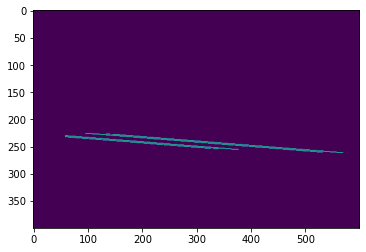

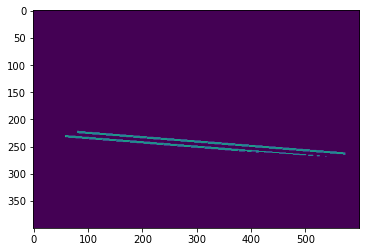

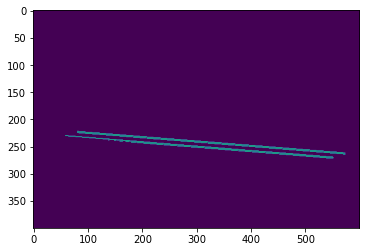

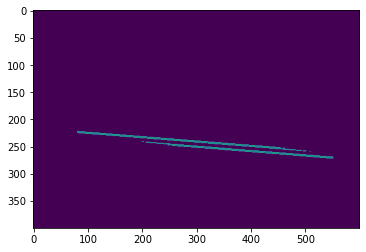

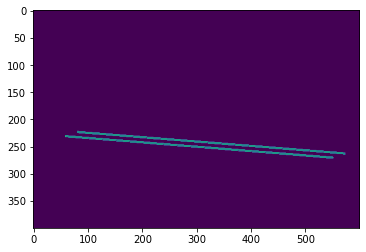

In [86]:
results, aggregated = merge_lines(edge_image, line_results)
plt.imshow(aggregated)
plt.show()

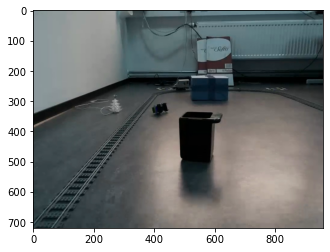

In [91]:
img2 = cv2.imread(f"handpicked_rails/2021-07-01-17-07-48/fps_1_frame_018.jpg")
plt.imshow(img2)
plt.show()

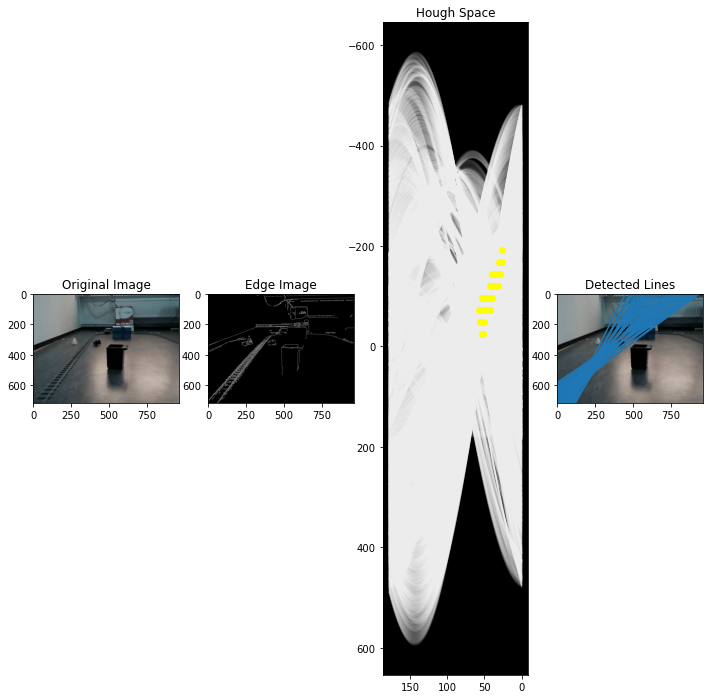

In [95]:
edge_image2 = cv2.Canny(img2, 100, 200)
acc, rhos, thetas, line_results2 = line_detection_non_vectorized(img2, edge_image2, t_count=2000)

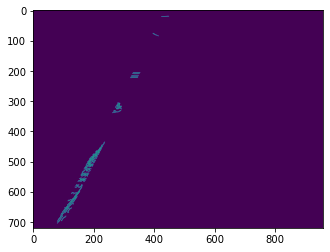

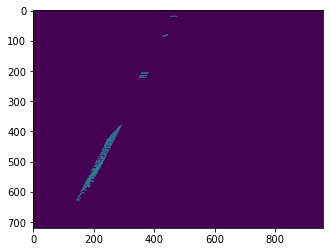

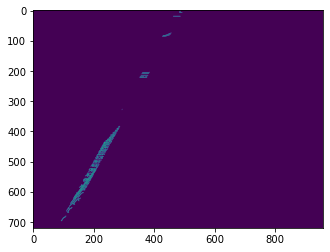

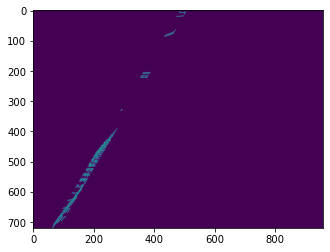

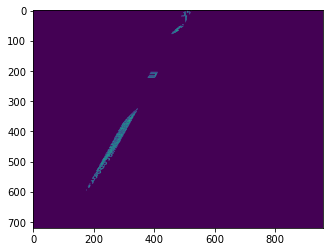

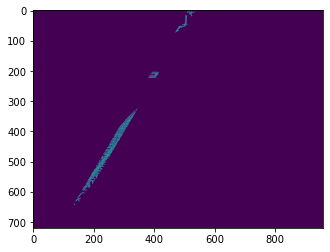

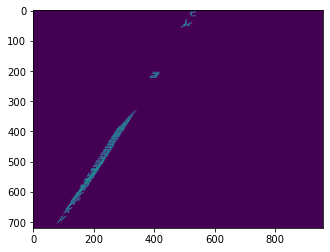

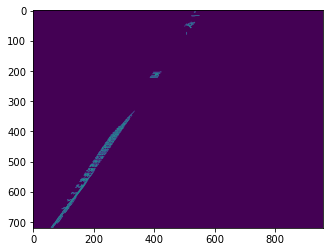

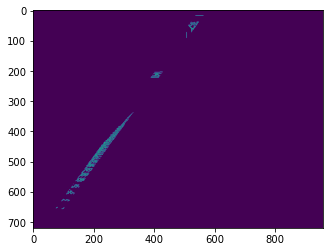

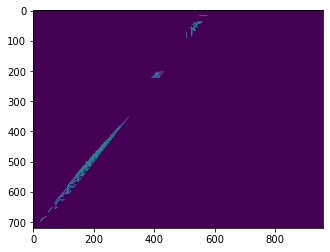

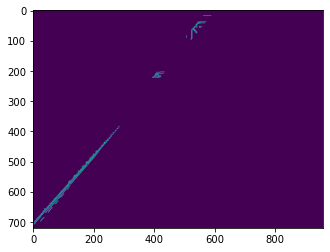

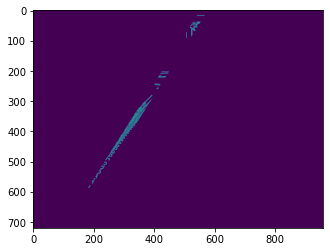

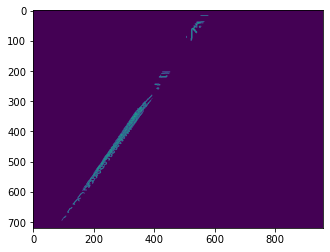

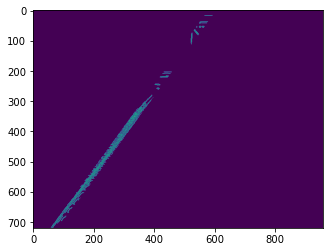

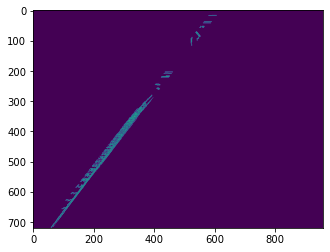

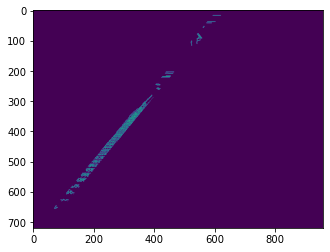

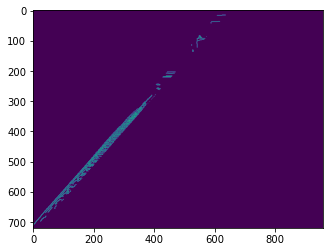

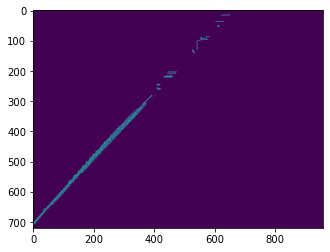

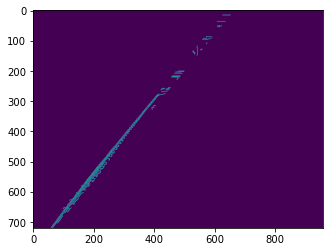

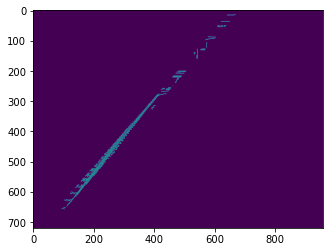

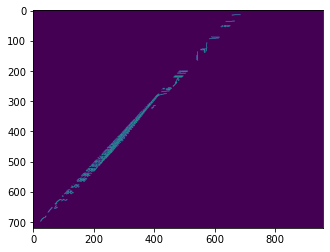

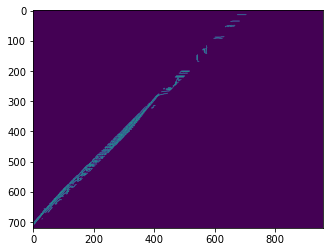

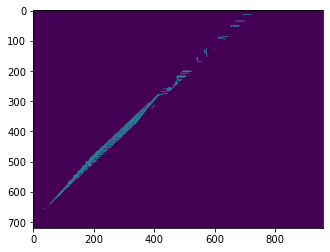

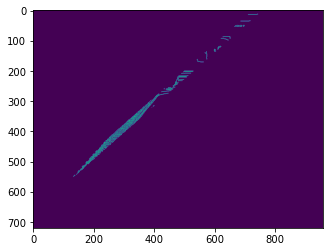

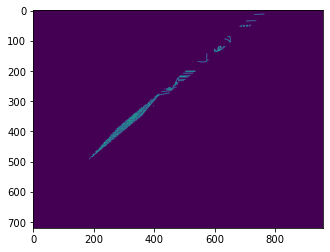

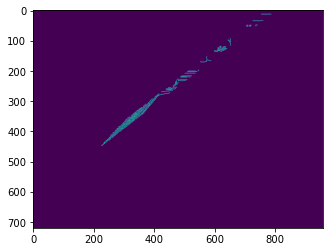

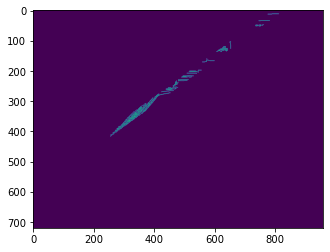

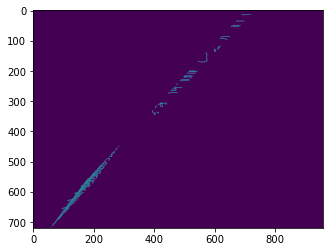

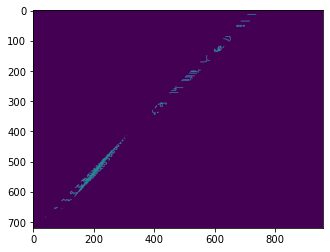

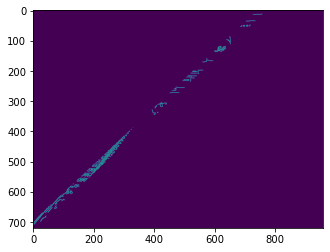

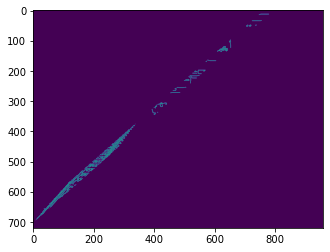

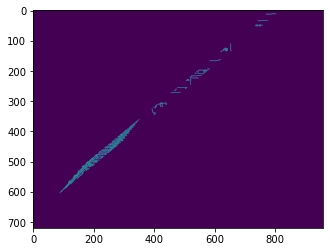

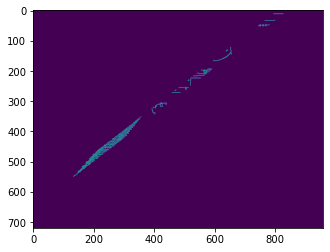

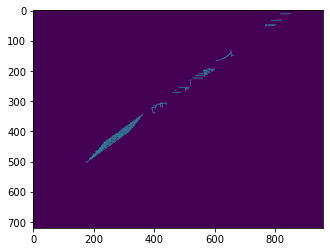

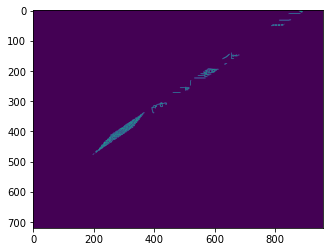

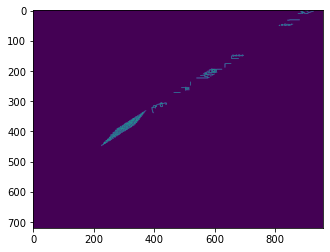

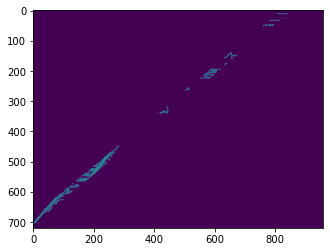

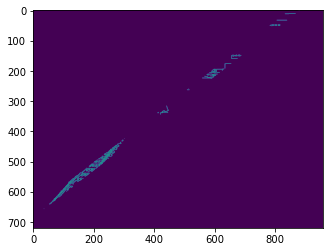

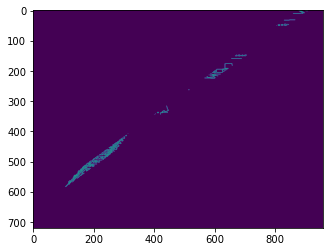

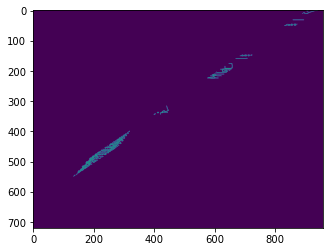

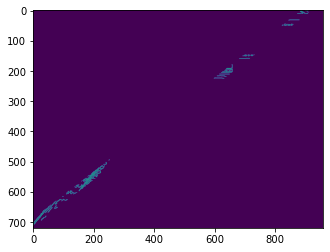

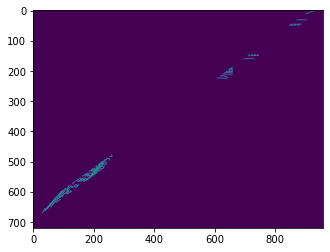

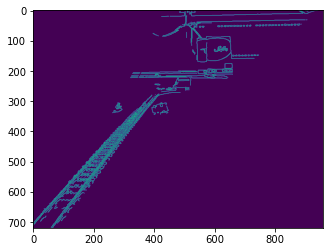

In [96]:
results, aggregated = merge_lines(edge_image2, line_results2)
plt.imshow(aggregated)
plt.show()